In [1]:
import os
import h5py
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import scipy.signal
data_dir='~/Data/'
import numpy
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# make sure we're dealing with the most recent version of any code we're using
%load_ext autoreload
%autoreload 2
%cd ~/Data/
%pwd

filename = 'processed_ATL07-01_20181202120647_09910101_001_01.h5'
# See what is in a particular file
# !h5ls -r processed_ATL07-01_20181202120647_09910101_001_01.h5

/home/jovyan/Data


In [4]:
%pwd

namer = ['gt1r','gt1l','gt2r','gt2l','gt3r','gt3l']
print(namer)

f = h5py.File(filename, 'r')


[xval,conc,lat,lon,SSH,qual,pgram] = ([] for i in range(7))

for x in range(len(namer)):
    
    # Load in all beams
    xval.append(f[namer[x] + '/sea_ice_segments/seg_dist_x'][:] - f[namer[x] + '/sea_ice_segments/seg_dist_x'][0]) 
    conc.append(f[namer[x] + '/sea_ice_segments/stats/ice_conc'][:])
    lat.append(f[namer[x] + '/sea_ice_segments/latitude'][:])
    lon.append(f[namer[x] + '/sea_ice_segments/longitude'][:])
    SSH.append(f[namer[x] + '/sea_ice_segments/heights/height_segment_height'][:])
    qual.append(f[namer[x] + '/sea_ice_segments/heights/height_segment_fit_quality_flag'][:])
 
    
    
#plt.scatter(lat,SSH,c=qual); plt.colorbar()

['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']


In [ ]:
plt.subplot(1,2,1)    
plt.plot(xval[1],SSH[1])
     
ax1 = plt.subplot(1,2,2, projection=ccrs.NorthPolarStereo(true_scale_latitude=70))
ax1.coastlines()
ax1.scatter(lon[1], lat[1],c=qual[1], cmap='viridis',transform=ccrs.PlateCarree())
ax1.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

#     ax1.quiver(x, y, u, v, transform=vector_crs)    
    
# plt.subplot(1,2,2,projection=)
# ax.coastlines()
# plt.show()


# 
# 
# #plt.pcolormesh(lons, lats, tile_to_plot,
# #               transform=ccrs.PlateCarree());
# # plt.coastlines()
# #ax.drawmeridians()
# plt.colorbar(label=var, shrink=0.5, extend='both')
# # Limit the map to -60 degrees latitude and below.


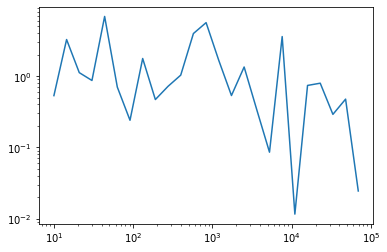

In [28]:
good = qual > 1; 
yvec = SSH[good]
xvec = lat[good]
xbuckets = numpy.logspace(1, 5, num=25, endpoint=False, base=10.0, dtype=None)
pgram = scipy.signal.lombscargle(xvec,yvec,xbuckets)
plt.loglog(xbuckets,pgram)